In [40]:
# !pip install numpy
# !pip install pandas
# !pip instal matplotlib
# !pip install scipy

In [41]:
import numpy as np 
import pandas as pd 
from scipy.stats import kde
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import os

In [42]:
df = pd.read_csv("IRIS.csv")

In [43]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [44]:
print("Mean:",np.mean(df['sepal_length']))
print("Median:",np.median(df['sepal_length']))
print(stats.mode(df['sepal_length']))

Mean: 5.843333333333334
Median: 5.8
ModeResult(mode=5.0, count=10)


In [45]:
print("Variance: ", np.var(df["petal_width"]))
print("std_deviation: ",np.std(df["petal_width"]))

Variance:  0.5785315555555555
std_deviation:  0.7606126185881716


In [46]:
numerical_features = df.select_dtypes(include=[np.number]) 
summary_stats = numerical_features.describe(percentiles=[0.25, 0.5, 0.75]) 
print(summary_stats.round(2))

       sepal_length  sepal_width  petal_length  petal_width
count        150.00       150.00        150.00       150.00
mean           5.84         3.05          3.76         1.20
std            0.83         0.43          1.76         0.76
min            4.30         2.00          1.00         0.10
25%            5.10         2.80          1.60         0.30
50%            5.80         3.00          4.35         1.30
75%            6.40         3.30          5.10         1.80
max            7.90         4.40          6.90         2.50


In [47]:
mu = 5.84  
sigma = 0.83
X = norm(loc=mu, scale=sigma)
print(f"Probability of sepal length:", X.cdf(6) - X.cdf(5))

Probability of sepal length: 0.4206733692833103


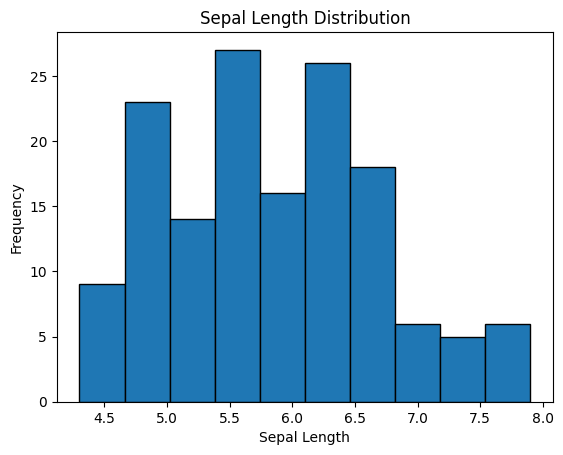

In [48]:
# sepal_length = df["sepal_length"]
# plt.hist(sepal_length)
# plt.xlabel("Sepal Length")
# plt.ylabel("Frequency")
# plt.title("Sepal Length Distribution")
# plt.show()

sepal_length = df["sepal_length"]

plt.hist(sepal_length, bins=10, edgecolor='black') 
plt.xlabel("Sepal Length")
plt.ylabel("Frequency")
plt.title("Sepal Length Distribution")
# plt.grid(False) 
plt.show()

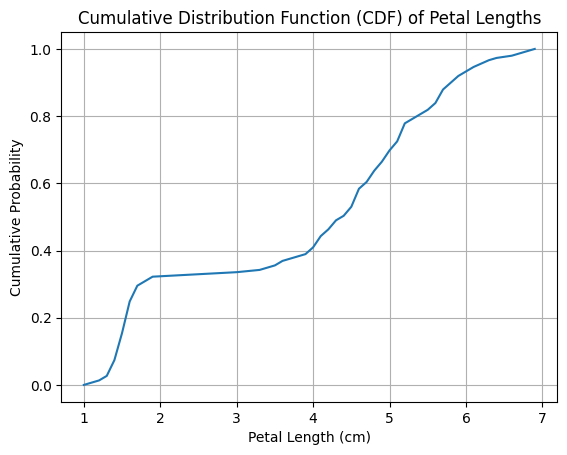

In [49]:
petal_length = df["petal_length"]
sorted_petal_length = sorted(petal_length)
cdf = [sorted_petal_length.index(p) / (len(sorted_petal_length) - 1) for p in sorted_petal_length]
plt.plot(sorted_petal_length, cdf)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution Function (CDF) of Petal Lengths")
plt.grid(True)
plt.show()

C:\Users\pratr\AppData\Local\Temp\ipykernel_7656\3760823998.py:2: DeprecationWarning: Please import `gaussian_kde` from the `scipy.stats` namespace; the `scipy.stats.kde` namespace is deprecated and will be removed in SciPy 2.0.0.
  kde_dist = kde.gaussian_kde(sepal_width)


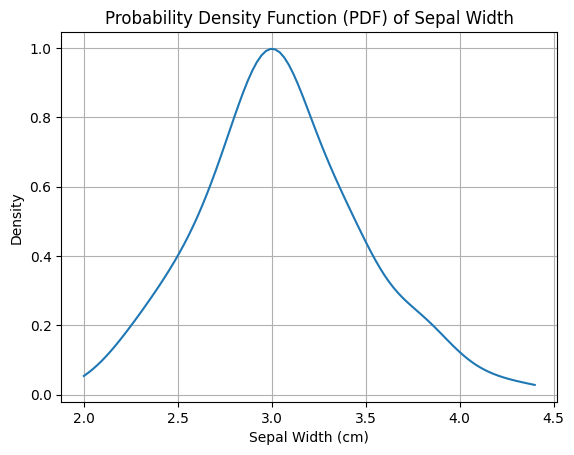

In [50]:
sepal_width = df["sepal_width"]
kde_dist = kde.gaussian_kde(sepal_width)
x = np.linspace(min(sepal_width), max(sepal_width), 100)  
density = kde_dist(x)
plt.plot(x, density)
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Density")
plt.title("Probability Density Function (PDF) of Sepal Width")
plt.grid(True)
plt.show()

In [51]:
petal_length = df["petal_length"]
threshold_value =  4.00
greater_than_threshold = petal_length[petal_length > threshold_value]
probability = len(greater_than_threshold) / len(petal_length)
print(f"Probability of petal length > {threshold_value}cm: {probability:.4f}")

Probability of petal length > 4.0cm: 0.5600


In [52]:
species1 = "setosa"  
species2 = "versicolor"  
petal_length_species1 = df[df["species"] == species1]["petal_length"]
petal_length_species2 = df[df["species"] == species2]["petal_length"]
t_statistic, p_value = stats.ttest_ind(petal_length_species1, petal_length_species2)
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is a significant difference in mean petal length between", species1, "and", species2)
else:
    print("Fail to reject H0: Evidence is inconclusive for a significant difference.")

Fail to reject H0: Evidence is inconclusive for a significant difference.


C:\Users\pratr\AppData\Local\Temp\ipykernel_7656\3041131023.py:5: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_statistic, p_value = stats.ttest_ind(petal_length_species1, petal_length_species2)


In [53]:
sepal_length = df["sepal_length"]
sepal_width = df["sepal_width"]
covariance = np.cov(sepal_length, sepal_width)[0, 1]  
correlation = np.corrcoef(sepal_length, sepal_width)[0, 1]  
print("Covariance:", covariance)
print("Correlation coefficient:", correlation)
if covariance > 0:
  print("Positive covariance suggests sepal length and width tends to increase together.")
elif covariance < 0:
  print("Negative covariance suggests sepal length and width tends to move in opposite directions.")
else:
  print("Covariance is zero, indicating no linear relationship between sepal length and sepal width.")

Covariance: -0.03926845637583891
Correlation coefficient: -0.1093692499506493
Negative covariance suggests sepal length and width tends to move in opposite directions.
